In [1]:

import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling



import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.utils import shuffle



from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error


2023-02-08 11:18:55.718559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 11:18:55.891442: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-08 11:18:55.894886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 11:18:55.894895: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df_raw = pd.read_csv('data10.csv') # to import the dataset into a variable
df_raw.columns = ["duration", 
              "protocol_type", 
              "service", 
              "flag", 
              "src_bytes", 
              "dst_bytes", 
              "land", 
              "wrong_fragment", 
              "urgent", 
              "hot", 
              "num_failed_logins", 
              "logged_in", 
              "num_compromised", 
              "root_shell", 
              "su_attempted", 
              "num_root", 
              "num_file_creations", 
              "num_shells", 
              "num_access_files", 
              "num_outbound_cmds",
              "is_host_login",
              "is_guest_login",
              "count",
              "srv_count",
              "serror_rate",
              "srv_serror_rate",
              "rerror_rate",
              "srv_rerror_rate",
              "same_srv_rate",
              "diff_srv_rate",
              "srv_diff_host_rate",
              "dst_host_count",
              "dst_host_srv_count",
              "dst_host_same_srv_rate",
              "dst_host_diff_srv_rate",
              "dst_host_same_src_port_rate",
              "dst_host_srv_diff_host_rate",
              "dst_host_serror_rate",
              "dst_host_srv_serror_rate",
              "dst_host_rerror_rate",
              "dst_host_srv_rerror_rate",
              "type"
]
# Splitting the attributes into independent and dependent attributes

In [3]:
df_raw.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
df_raw.shape

(494020, 42)

In [5]:
rep_protocol = {}

for val in df_raw["protocol_type"]:
    rep_protocol.update({val:True})
rep_protocol

count = 0
for key in rep_protocol:
    rep_protocol.update({key:count})
    count+=1
rep_protocol

{'tcp': 0, 'udp': 1, 'icmp': 2}

In [6]:
df_raw = df_raw.replace({"protocol_type": rep_protocol})

In [7]:
df_raw

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,0,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,0,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,0,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,0,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,0,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,0,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,0,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,0,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,0,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [8]:
rep_service = {}

for val in df_raw["service"]:
    rep_service.update({val:True})

count = 0
for key in rep_service:
    rep_service.update({key:count})
    count+=1
rep_service

{'http': 0,
 'smtp': 1,
 'finger': 2,
 'domain_u': 3,
 'auth': 4,
 'telnet': 5,
 'ftp': 6,
 'eco_i': 7,
 'ntp_u': 8,
 'ecr_i': 9,
 'other': 10,
 'private': 11,
 'pop_3': 12,
 'ftp_data': 13,
 'rje': 14,
 'time': 15,
 'mtp': 16,
 'link': 17,
 'remote_job': 18,
 'gopher': 19,
 'ssh': 20,
 'name': 21,
 'whois': 22,
 'domain': 23,
 'login': 24,
 'imap4': 25,
 'daytime': 26,
 'ctf': 27,
 'nntp': 28,
 'shell': 29,
 'IRC': 30,
 'nnsp': 31,
 'http_443': 32,
 'exec': 33,
 'printer': 34,
 'efs': 35,
 'courier': 36,
 'uucp': 37,
 'klogin': 38,
 'kshell': 39,
 'echo': 40,
 'discard': 41,
 'systat': 42,
 'supdup': 43,
 'iso_tsap': 44,
 'hostnames': 45,
 'csnet_ns': 46,
 'pop_2': 47,
 'sunrpc': 48,
 'uucp_path': 49,
 'netbios_ns': 50,
 'netbios_ssn': 51,
 'netbios_dgm': 52,
 'sql_net': 53,
 'vmnet': 54,
 'bgp': 55,
 'Z39_50': 56,
 'ldap': 57,
 'netstat': 58,
 'urh_i': 59,
 'X11': 60,
 'urp_i': 61,
 'pm_dump': 62,
 'tftp_u': 63,
 'tim_i': 64,
 'red_i': 65}

In [9]:
df_raw = df_raw.replace({"service": rep_service})


In [10]:
df_raw

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,0,0,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,0,0,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,0,0,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,0,0,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,0,0,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,0,0,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,0,0,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,0,0,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,0,0,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [11]:
rep_flag = {}

for val in df_raw["flag"]:
    rep_flag.update({val:True})

count = 0
for key in rep_flag:
    rep_flag.update({key:count})
    count+=1
rep_flag

{'SF': 0,
 'S1': 1,
 'REJ': 2,
 'S2': 3,
 'S0': 4,
 'S3': 5,
 'RSTO': 6,
 'RSTR': 7,
 'RSTOS0': 8,
 'OTH': 9,
 'SH': 10}

In [12]:
df_raw = df_raw.replace({"flag": rep_flag})

In [13]:
df_raw

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,0,0,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,0,0,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,0,0,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,0,0,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,0,0,0,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,0,0,0,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,0,0,0,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,0,0,0,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,0,0,0,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [14]:
rep_type = {}

for val in df_raw["type"]:
    rep_type.update({val:True})

for key in rep_type:
    rep_type.update({key:1})
    
rep_type.update({'normal.':0})
rep_type

{'normal.': 0,
 'buffer_overflow.': 1,
 'loadmodule.': 1,
 'perl.': 1,
 'neptune.': 1,
 'smurf.': 1,
 'guess_passwd.': 1,
 'pod.': 1,
 'teardrop.': 1,
 'portsweep.': 1,
 'ipsweep.': 1,
 'land.': 1,
 'ftp_write.': 1,
 'back.': 1,
 'imap.': 1,
 'satan.': 1,
 'phf.': 1,
 'nmap.': 1,
 'multihop.': 1,
 'warezmaster.': 1,
 'warezclient.': 1,
 'spy.': 1,
 'rootkit.': 1}

In [15]:
df_raw = df_raw.replace({"type": rep_type})
df_raw

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,0,0,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
1,0,0,0,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
2,0,0,0,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,0,0,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
4,0,0,0,0,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,0,0,0,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494016,0,0,0,0,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494017,0,0,0,0,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494018,0,0,0,0,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [16]:
df_raw.shape

(494020, 42)

In [17]:
#reading the dataset
df = df_raw

def read_dataset():
    #print
    X = df[df.columns[0:42]].values
    y = df[df.columns[41]]
    
    
    #encode the dependant variable
    Y = one_hot_encode(y)
    print(X.shape)
    print(Y.shape)
    return(X,Y)

#define one-hot-encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

#Read the dataset
X, Y = read_dataset()



(494020, 42)
(494020, 2)


In [18]:
#shufffle the dataset to mix up the rows
X,Y = shuffle(X, Y,random_state = 1)

#dataset into train & test 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state=415)

#shapes of the training and testing
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(395216, 42)
(395216, 2)
(98804, 42)
(98804, 2)


In [19]:
#define the important parameters and variables to work with the tensors
learning_rate = 0.4
training_epochs = 500
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "model"



n_dim 42


In [20]:
#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 20
n_hidden_2 = 20
n_hidden_3 = 20

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

y_


<tf.Tensor 'Placeholder_1:0' shape=(?, 2) dtype=float32>

In [21]:
#define the model

def attack_finder(x, weights, biases):
    
    #RELU activation function
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
    layer_1 = tf.nn.relu(layer_1)
    
    #sigmoid activation function
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
    layer_2 = tf.nn.sigmoid(layer_2)
     
    #softmax activation function
    layer_3 = tf.add(tf.matmul(layer_2, weights["h3"]), biases["b3"])
    layer_3 = tf.nn.softmax(layer_3)
    
    #outer layer relu activation function
    out_layer = tf.add(tf.matmul(layer_3, weights["out"]), biases["out"])
    out_layer = tf.nn.softmax(out_layer)
    
    return out_layer
    
    


In [22]:
#Define the weights and biases for each layer

weights = {
    "h1" : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2" : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3" : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "out" : tf.Variable(tf.truncated_normal([n_hidden_3, n_class]))
}
biases = {
    "b1" : tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2" : tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3" : tf.Variable(tf.truncated_normal([n_hidden_3])),
    "out" : tf.Variable(tf.truncated_normal([n_class]))
}
    


In [23]:
# Initialize all the variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()



In [24]:
#call your model defined
y = attack_finder(x, weights, biases)

print(y_.shape)

(?, 2)


In [25]:
#define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

#training_step = tf.train.GradientDescentOptimizer(learning_rate)

In [26]:
sess = tf.Session()
sess.run(init)


2023-02-08 11:18:59.584085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 11:18:59.584267: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 11:18:59.584494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-08 11:18:59.584531: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-08 11:18:59.584562: W tensorflow/c

In [27]:
#calculate the cost and accuracy for each epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    #print 
    
    pred_y = sess.run(y, feed_dict ={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print("epoch : ", epoch, "-", "cost: ", cost, "- MSE: ", mse_, "- train Accuracy: ", accuracy)
    
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)



epoch :  0 - cost:  0.57707393 - MSE:  0.15334350066996083 - train Accuracy:  0.81037205
epoch :  1 - cost:  0.55792254 - MSE:  0.14184570765744028 - train Accuracy:  0.80550385
epoch :  2 - cost:  0.54424024 - MSE:  0.13425677638056005 - train Accuracy:  0.8060402
epoch :  3 - cost:  0.5344901 - MSE:  0.12967764575525512 - train Accuracy:  0.8076824
epoch :  4 - cost:  0.52675945 - MSE:  0.1263662630167646 - train Accuracy:  0.8076495
epoch :  5 - cost:  0.520598 - MSE:  0.12405736955643692 - train Accuracy:  0.80588335
epoch :  6 - cost:  0.51588184 - MSE:  0.12264247519957804 - train Accuracy:  0.80632365
epoch :  7 - cost:  0.51193064 - MSE:  0.12154297815887402 - train Accuracy:  0.8067259
epoch :  8 - cost:  0.50825775 - MSE:  0.12015174624824235 - train Accuracy:  0.8071991
epoch :  9 - cost:  0.5050057 - MSE:  0.11906606328981074 - train Accuracy:  0.8076267
epoch :  10 - cost:  0.5020739 - MSE:  0.1180011831205043 - train Accuracy:  0.80811
epoch :  11 - cost:  0.4991582 - MSE

epoch :  93 - cost:  0.37429255 - MSE:  0.0241230481101372 - train Accuracy:  0.9754362
epoch :  94 - cost:  0.3735326 - MSE:  0.02380375297681404 - train Accuracy:  0.9754767
epoch :  95 - cost:  0.37278184 - MSE:  0.023481844038485602 - train Accuracy:  0.9754868
epoch :  96 - cost:  0.37203452 - MSE:  0.02315027652977221 - train Accuracy:  0.9756057
epoch :  97 - cost:  0.3712844 - MSE:  0.02281399407426702 - train Accuracy:  0.97568417
epoch :  98 - cost:  0.37053192 - MSE:  0.02249226441992265 - train Accuracy:  0.97583854
epoch :  99 - cost:  0.3697769 - MSE:  0.022170953467909496 - train Accuracy:  0.9759347
epoch :  100 - cost:  0.36901462 - MSE:  0.021859498267309936 - train Accuracy:  0.97602576
epoch :  101 - cost:  0.36828262 - MSE:  0.021556274186911036 - train Accuracy:  0.9761194
epoch :  102 - cost:  0.36767498 - MSE:  0.02130130119116427 - train Accuracy:  0.9762408
epoch :  103 - cost:  0.36711234 - MSE:  0.021032962566878102 - train Accuracy:  0.97641796
epoch :  104

epoch :  184 - cost:  0.34414974 - MSE:  0.013044668017560991 - train Accuracy:  0.9870349
epoch :  185 - cost:  0.3440179 - MSE:  0.013009420856650937 - train Accuracy:  0.9870577
epoch :  186 - cost:  0.3438858 - MSE:  0.01297377973289016 - train Accuracy:  0.9870729
epoch :  187 - cost:  0.34375674 - MSE:  0.01294386592186684 - train Accuracy:  0.98707795
epoch :  188 - cost:  0.34362775 - MSE:  0.012915986053875285 - train Accuracy:  0.98709315
epoch :  189 - cost:  0.34350052 - MSE:  0.012888268661700439 - train Accuracy:  0.98709565
epoch :  190 - cost:  0.34337702 - MSE:  0.01286155298146417 - train Accuracy:  0.9871083
epoch :  191 - cost:  0.3432555 - MSE:  0.012832416822948603 - train Accuracy:  0.98714375
epoch :  192 - cost:  0.34313506 - MSE:  0.012803396804713681 - train Accuracy:  0.9871539
epoch :  193 - cost:  0.343017 - MSE:  0.012777188337649318 - train Accuracy:  0.98716146
epoch :  194 - cost:  0.34290203 - MSE:  0.012751712433647675 - train Accuracy:  0.9871665
ep

epoch :  275 - cost:  0.3363722 - MSE:  0.011573235694668333 - train Accuracy:  0.987627
epoch :  276 - cost:  0.3363206 - MSE:  0.011568765528865215 - train Accuracy:  0.9876321
epoch :  277 - cost:  0.3362711 - MSE:  0.011562440695154408 - train Accuracy:  0.9876321
epoch :  278 - cost:  0.33622223 - MSE:  0.01155902194621012 - train Accuracy:  0.9876346
epoch :  279 - cost:  0.33617377 - MSE:  0.011551606617457097 - train Accuracy:  0.98763967
epoch :  280 - cost:  0.33612546 - MSE:  0.011545697147312552 - train Accuracy:  0.98763716
epoch :  281 - cost:  0.33607778 - MSE:  0.011536806656835662 - train Accuracy:  0.98763967
epoch :  282 - cost:  0.33603024 - MSE:  0.011532632993143131 - train Accuracy:  0.98764473
epoch :  283 - cost:  0.3359839 - MSE:  0.011524074087177776 - train Accuracy:  0.98763967
epoch :  284 - cost:  0.33593777 - MSE:  0.011521350435940273 - train Accuracy:  0.98764724
epoch :  285 - cost:  0.33589292 - MSE:  0.011513126623099012 - train Accuracy:  0.9876447

epoch :  366 - cost:  0.3330318 - MSE:  0.01119497743721643 - train Accuracy:  0.988085
epoch :  367 - cost:  0.33300564 - MSE:  0.011191963284652115 - train Accuracy:  0.988085
epoch :  368 - cost:  0.3329792 - MSE:  0.011189041669390871 - train Accuracy:  0.988085
epoch :  369 - cost:  0.33295238 - MSE:  0.011186237116607349 - train Accuracy:  0.988085
epoch :  370 - cost:  0.33292675 - MSE:  0.011183559897142438 - train Accuracy:  0.988085
epoch :  371 - cost:  0.33290103 - MSE:  0.011181048249110563 - train Accuracy:  0.988085
epoch :  372 - cost:  0.33287457 - MSE:  0.011178761397441728 - train Accuracy:  0.98809004
epoch :  373 - cost:  0.3328489 - MSE:  0.011176932312182059 - train Accuracy:  0.98809004
epoch :  374 - cost:  0.33282244 - MSE:  0.011175141590452327 - train Accuracy:  0.988085
epoch :  375 - cost:  0.33279696 - MSE:  0.011173169862134258 - train Accuracy:  0.9880951
epoch :  376 - cost:  0.33277106 - MSE:  0.011170550893201115 - train Accuracy:  0.9880951
epoch : 

epoch :  457 - cost:  0.33097973 - MSE:  0.010892689583279973 - train Accuracy:  0.9883355
epoch :  458 - cost:  0.33096147 - MSE:  0.010886281064261332 - train Accuracy:  0.9883456
epoch :  459 - cost:  0.33094412 - MSE:  0.010887730430343901 - train Accuracy:  0.98834056
epoch :  460 - cost:  0.3309259 - MSE:  0.010879230624806899 - train Accuracy:  0.9883507
epoch :  461 - cost:  0.3309089 - MSE:  0.010881577083282976 - train Accuracy:  0.9883456
epoch :  462 - cost:  0.3308918 - MSE:  0.010874441410449267 - train Accuracy:  0.9883507
epoch :  463 - cost:  0.33087435 - MSE:  0.010876614040013605 - train Accuracy:  0.9883456
epoch :  464 - cost:  0.3308577 - MSE:  0.01087025609728368 - train Accuracy:  0.9883507
epoch :  465 - cost:  0.3308409 - MSE:  0.010872002493789942 - train Accuracy:  0.9883507
epoch :  466 - cost:  0.33082375 - MSE:  0.010866027672729432 - train Accuracy:  0.98835576
epoch :  467 - cost:  0.3308074 - MSE:  0.010866992183951308 - train Accuracy:  0.9883532
epoc

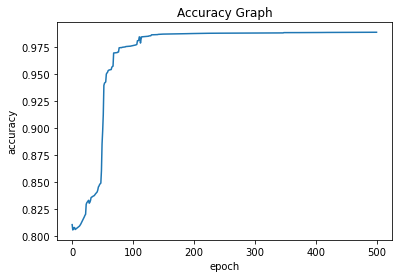

In [28]:
#plot Accuracy Graph
plt.plot(accuracy_history)
plt.title("Accuracy Graph")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()




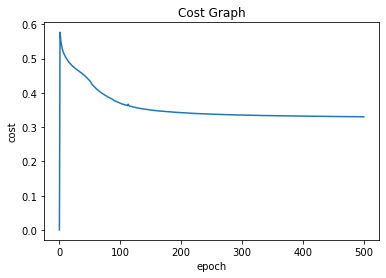

In [29]:
#plot Cost Graph
plt.plot(cost_history)
plt.title("Cost Graph")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()


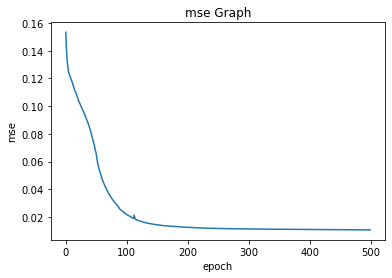

In [30]:
#plot mse Graph
plt.plot(mse_history)
plt.title("mse Graph")
plt.xlabel("epoch")
plt.ylabel("mse")
plt.show()

In [31]:
#print final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print ("test accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
            
                              


test accuracy:  0.9883102


In [32]:
#print the final mean sq error
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y) - test_y)                              
print ("Mse: %.4f" % sess.run(mse)) 

Mse: -0.0120


In [33]:
pred_y

array([[0.00621263, 0.99378735],
       [0.00553988, 0.99446017],
       [0.9753997 , 0.02460029],
       ...,
       [0.00621264, 0.9937874 ],
       [0.00553936, 0.9944607 ],
       [0.00621264, 0.9937874 ]], dtype=float32)

In [34]:
test_x

array([[0., 2., 9., ..., 0., 0., 1.],
       [0., 2., 9., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 2., 9., ..., 0., 0., 1.],
       [0., 2., 9., ..., 0., 0., 1.],
       [0., 2., 9., ..., 0., 0., 1.]])